# Task

Sergei Mikhailovich Prokudin-Gorskii (1863-1944), a pioneering photographer extensively traveled the Russian Empire from 1909 to 1915, capturing thousands of images. Employing an early color technology, he recorded three images of each scene onto glass plates using red, green, and blue filters. 

Your task is to take Gorskii glass plate RGB color channels and produce a color image with as few visual artifacts as possible (ignore the artifacts at the image boundaries). To do this, you will need to read the image file, extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. You will need to implement this in Python.

**Note** that the channel order for all files from top to bottom is BGR, not RGB!

In [2]:
!conda activate cv

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.1/39.5 MB 193.2 kB/s eta 0:03:25
   ---------------------------------------- 0.2/39.5 MB 364.8 kB/s eta 0:01:48
   ---------------------------------------- 0.2/39.5 MB 364.8 kB/s eta 0:01:48
   ---------------------------------------- 0.2/39.5 MB 457.3 kB/s eta 0:01:26
 


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

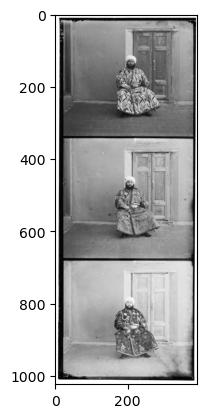

In [7]:
ausid = 12345 # use last five digits of your ausid, e.g 83452
if ausid % 3 == 0: filename = '00153v.jpg'
if ausid % 3 == 1: filename = '00149v.jpg'
if ausid % 3 == 2: filename = '00351v.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)



plt.imshow(img, cmap='gray')


In [9]:
# Step 1 [5 points]: Read the image, extract the Blue, Green and Red channels, stack the channels and display using matplotlib
# TODO: YOUR CODE
h = img.shape
h = int(h/3)

b = img[0:h,:]
g = img[h:2*h,:]
r = img[2*h:3*h,:]

stack = np.dstack((b,g,r))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')

#opencv uses bgr
#matplotlib uses rgb





# When you display the image, you will notice that the color channels are not aligned properly. 

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [4]:
# Step 2: Find the displacement needed to align RGB channels by following the steps below:
#          (1) [3 pts] Use canny edge detector to find the edges 
# TODO: YOUR CODE




#         (2) [4 pts] Identify horizontal or vertical edges which could help you find the displacement needed 
#             to align the color channels. You can just write your findings here. 
#             No need to show the code for this section
# TODO: YOUR Findings
#
#
#
#

#         (3) [6 pts] Design and apply filters using convolution to align/shift the color channels 
# TODO: YOUR CODE





#         (4) [2 pts] stacking the channels and display. 
# TODO: YOUR CODE

# Submission

- Submit the pdf of this completed notebook on iLearn